An n x n grid is composed of 1 x 1 squares where each 1 x 1 square consists of a '/', '\', or blank space ' '. These characters divide the square into contiguous regions.

Given the grid grid represented as a string array, return the number of regions.

Note that backslash characters are escaped, so a '\' is represented as '\\'.

 

Example 1:

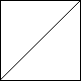

Input: grid = [" /","/ "]
Output: 2

Example 2:

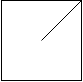

Input: grid = [" /","  "]
Output: 1

Example 3:

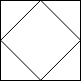

Input: grid = ["/\\","\\/"]
Output: 5
Explanation: Recall that because \ characters are escaped, "\\/" refers to \/, and "/\\" refers to /\.

 

Constraints:

    n == grid.length == grid[i].length
    1 <= n <= 30
    grid[i][j] is either '/', '\', or ' '.



In [ ]:
class Solution:
    def regionsBySlashes(self, grid: List[str]) -> int:
        grid_size = len(grid)
        total_triangles = grid_size * grid_size * 4
        parent_array = [-1] * total_triangles

        # Initially, each small triangle is a separate region
        region_count = total_triangles

        for row in range(grid_size):
            for col in range(grid_size):
                # Connect with the cell above
                if row > 0:
                    region_count -= self._union_triangles(
                        parent_array,
                        self._get_triangle_index(grid_size, row - 1, col, 2),
                        self._get_triangle_index(grid_size, row, col, 0),
                    )
                # Connect with the cell to the left
                if col > 0:
                    region_count -= self._union_triangles(
                        parent_array,
                        self._get_triangle_index(grid_size, row, col - 1, 1),
                        self._get_triangle_index(grid_size, row, col, 3),
                    )

                # If not '/', connect triangles 0-1 and 2-3
                if grid[row][col] != "/":
                    region_count -= self._union_triangles(
                        parent_array,
                        self._get_triangle_index(grid_size, row, col, 0),
                        self._get_triangle_index(grid_size, row, col, 1),
                    )
                    region_count -= self._union_triangles(
                        parent_array,
                        self._get_triangle_index(grid_size, row, col, 2),
                        self._get_triangle_index(grid_size, row, col, 3),
                    )

                # If not '\', connect triangles 0-3 and 1-2
                if grid[row][col] != "\\":
                    region_count -= self._union_triangles(
                        parent_array,
                        self._get_triangle_index(grid_size, row, col, 0),
                        self._get_triangle_index(grid_size, row, col, 3),
                    )
                    region_count -= self._union_triangles(
                        parent_array,
                        self._get_triangle_index(grid_size, row, col, 2),
                        self._get_triangle_index(grid_size, row, col, 1),
                    )

        return region_count

    # Calculate the index of a triangle in the flattened array
    # Each cell is divided into 4 triangles, numbered 0 to 3 clockwise from the top
    def _get_triangle_index(self, grid_size, row, col, triangle_num):
        return (grid_size * row + col) * 4 + triangle_num

    # Union two triangles and return 1 if they were not already connected, 0 otherwise
    def _union_triangles(self, parent_array, x, y):
        parent_x = self._find_parent(parent_array, x)
        parent_y = self._find_parent(parent_array, y)
        if parent_x != parent_y:
            parent_array[parent_x] = parent_y
            return 1  # Regions were merged, so count decreases by 1
        return 0  # Regions were already connected

    # Find the parent (root) of a set
    def _find_parent(self, parent_array, x):
        if parent_array[x] == -1:
            return x
        parent_array[x] = self._find_parent(parent_array, parent_array[x])
        return parent_array[x]